In [44]:
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os

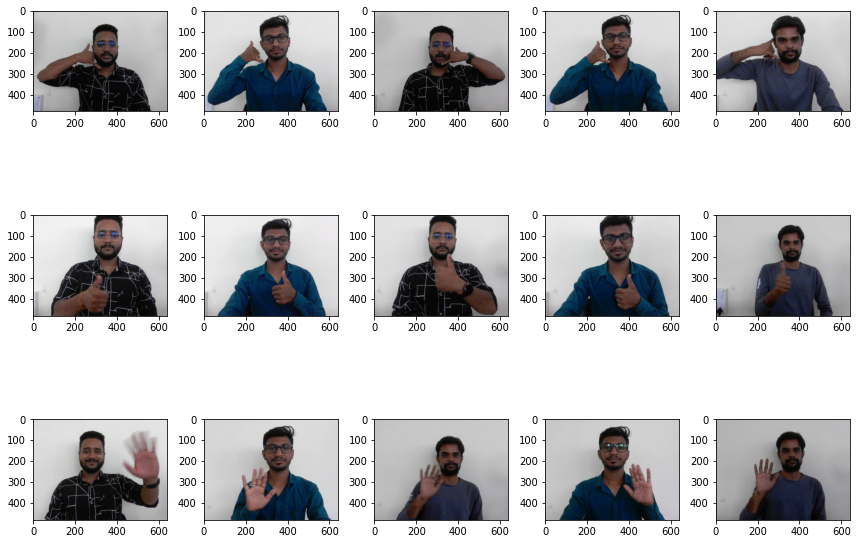

In [21]:
# size of the image: 48*48 pixels
pic_size_width = 640
pic_size_height = 480

# input path for the images
base_path = "Action_Frame/"

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size_height, pic_size_width))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

In [22]:
for sign in os.listdir(base_path + "train"):
    print(str(len(os.listdir(base_path + "train/" + sign))) + " " + sign + " samples")

300 call me please samples
300 good samples
300 bye samples


In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# number of images to feed into the NN for every batch
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(base_path + "train",
                                                    target_size=(pic_size_height,pic_size_width),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(base_path + "validation",
                                                    target_size=(pic_size_height,pic_size_width),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 900 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


In [28]:
TRAINING_DIR = base_path + "train/"

training_datagen = ImageDataGenerator(
  rescale = 1./255,
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest'
)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(pic_size_width,pic_size_height),
    class_mode='categorical'
)

VALIDATION_DIR = base_path + "validation/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical'
)

Found 900 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


In [45]:
model = tf.keras.models.Sequential([
  # Note the input shape is the desired size of the image:
  # 150x150 with 3 bytes color
  # This is the first convolution
  tf.keras.layers.Conv2D(64, (3,3), activation='relu',
  input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  # The second convolution
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  # The third convolution
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  # The fourth convolution
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  # Flatten the results to feed into a DNN
  tf.keras.layers.Flatten(),
  # 512 neuron hidden layer
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])

In [31]:
# number of epochs to train the NN
epochs = 50

# from keras.callbacks import ModelCheckpoint

# checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]

In [37]:
# history = model.fit(generator=train_generator,
#                                 steps_per_epoch=train_generator.n//train_generator.batch_size,
#                                 epochs=epochs,
#                                 validation_data = validation_generator,
#                                 validation_steps = validation_generator.n//validation_generator.batch_size,
#                                 callbacks=callbacks_list
#                                 )

In [46]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [47]:
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (150, 150),
    class_mode = 'categorical'
)

Found 900 images belonging to 3 classes.


In [48]:
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator,
    verbose=1)

Epoch 1/25
29/29 [==============================] - 13s 432ms/step - loss: 1.2911 - accuracy: 0.3367 - val_loss: 1.1016 - val_accuracy: 0.3333
Epoch 2/25
29/29 [==============================] - 13s 432ms/step - loss: 1.1245 - accuracy: 0.3611 - val_loss: 1.0832 - val_accuracy: 0.3333
Epoch 3/25
29/29 [==============================] - 13s 441ms/step - loss: 1.0886 - accuracy: 0.3922 - val_loss: 1.0110 - val_accuracy: 0.6222
Epoch 4/25
29/29 [==============================] - 13s 438ms/step - loss: 1.0153 - accuracy: 0.4978 - val_loss: 0.8180 - val_accuracy: 0.6278
Epoch 5/25
29/29 [==============================] - 13s 450ms/step - loss: 0.9981 - accuracy: 0.5078 - val_loss: 0.8293 - val_accuracy: 0.6167
Epoch 6/25
29/29 [==============================] - 13s 448ms/step - loss: 0.9915 - accuracy: 0.5422 - val_loss: 0.7282 - val_accuracy: 0.7167
Epoch 7/25
29/29 [==============================] - 13s 440ms/step - loss: 0.8640 - accuracy: 0.6333 - val_loss: 0.5711 - val_accuracy: 0.6944

In [49]:
import pickle

pickle.dump(model, open('trained_model_3_signs.h5', 'wb'))

INFO:tensorflow:Assets written to: ram://533ab2df-963a-44d2-8b0f-5952f833d4db/assets


INFO:tensorflow:Assets written to: ram://533ab2df-963a-44d2-8b0f-5952f833d4db/assets


In [51]:
model.save('trained_model_3.h5')